# 垃圾邮件分类

https://www.kaggle.com/uciml/sms-spam-collection-dataset

## 读取数据

In [14]:
import pandas as pd
import numpy as np 

data_dir = "../input/"

df = pd.read_csv(data_dir + '/spam.csv', encoding='latin-1')  
# 编码相关阅读http://blog.csdn.net/robertcpp/article/details/7837712 

# 查看数据
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
# 查看v2的样本
df.v2.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [16]:
# 查看v1的样本
df.v1.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [17]:
# 查看数据的纬度
df.shape

(5572, 5)

## 把数据拆分成为训练集和测试集

In [18]:
from sklearn.model_selection import train_test_split

# 把数据拆分成训练集和测试集
data_train, data_test, labels_train, labels_test = train_test_split(
    df.v2,
    df.v1, 
    test_size=0.2, 
    random_state=0) 

# 查看训练集样本
print (data_train.head())
# 查看训练集标注
print (labels_train.head())
# 查看训练集的样本个数
print(data_train.shape)
# 查看测试机的样本个数
print(data_test.shape)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: v2, dtype: object
1114    ham
3589    ham
3095    ham
1012    ham
3320    ham
Name: v1, dtype: object
(4457,)
(1115,)


## 构建模型所需要的数据格式：一个词汇表，以及训练及测试数据的计数信息：(句子id,单词id)->计数

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# 调用库来构造分类器所需的输入数据
vectorizer = CountVectorizer()

#fit_transform一共完成了两件事
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform
#fit: 统计单词的总个数，建成一个表，每个单词给一个标号
#transform:统计每句话每个单词出现的次数

# 用训练集的单词来建立词库，因为测试集的数据在现实场景中属于未知数据，且统计训练集每句话词的出现次数
data_train_count = vectorizer.fit_transform(data_train)
# 在测试集上只统计每句话词的出现次数
data_test_count  = vectorizer.transform(data_test)

# 看看这些数据长什么样
# 词汇表
print (vectorizer.vocabulary_)
# 训练数据纬度
print (data_train_count.shape)
# 测试数据纬度
print (data_test_count.shape)

{'bloo': 1361, 'fav': 2740, 'ned': 4634, 'cream': 2038, 'kanji': 3823, 'damn': 2130, 'thy': 6753, 'deus': 2251, 'hundreds': 3486, 'ahead': 834, 'tb': 6597, 'box97n7qp': 1431, 'flurries': 2858, 'delete': 2207, 'yet': 7550, '06': 20, 'kerala': 3843, 'gona': 3124, 'remind': 5582, 'representative': 5610, 'monoc': 4485, '2getha': 375, 'apartment': 968, 'computer': 1914, 'experience': 2670, 'stagwood': 6309, 'sariyag': 5798, 'spageddies': 6233, 'rajnikant': 5451, '630': 547, 'reasons': 5507, 'amore': 910, 'nikiyu4': 4689, 'whereare': 7343, 'nvm': 4771, 'blame': 1345, 'aries': 1022, 'dvg': 2465, 'cheating': 1715, '08719899229': 145, 'starer': 6319, 'unsecured': 7040, 'wright': 7477, 'foot': 2882, 'hesitant': 3357, 'qlynnbv': 5412, 'gray': 3176, 'youphone': 7566, 'tddnewsletter': 6601, '48': 480, 'tel': 6620, 'bookedthe': 1387, 'cookies': 1978, '861': 649, '32': 424, 'chechi': 1716, 'hanks': 3266, 'dled': 2342, 'might': 4392, 'pushes': 5397, 'students': 6413, 'side': 6034, 'match': 4298, 'form

## 图形化展示一些数据，获得更直观的理解

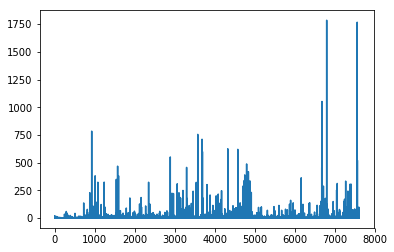

,occurrence,term
6799,1785,to
7562,1767,you
6681,1052,the
923,784,and
3575,755,in


In [20]:
import matplotlib.pyplot as plt # 画图常用库

# 我们来看看单词的分布
# 统计每个单词出现的次数
occurrence = data_train_count.toarray().sum(axis=0)
plt.plot(occurrence)
plt.show() # 显示图形

# 按照每个词出现的次数从高到低进行排序
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrence':occurrence})
word_freq_df_sort = word_freq_df.sort_values(by=['occurrence'], ascending=False)
word_freq_df_sort.head()

## 进行模型训练以及预测

In [21]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
print(predictions)

['ham' 'ham' 'ham' ..., 'ham' 'ham' 'ham']


## 计算模型的准确率

In [22]:
from sklearn.metrics import accuracy_score

print (accuracy_score(labels_test, predictions))

0.987443946188


## 其他常用指标: （Naive Bayes 第二节课会补充）

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(labels_test, predictions))
print (confusion_matrix(labels_test, predictions))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99       949
       spam       0.99      0.93      0.96       166

avg / total       0.99      0.99      0.99      1115

[[947   2]
 [ 12 154]]


## 交叉验证的示范:

In [24]:
from sklearn.model_selection import cross_val_score
# 从df获得全部邮件内容和标注
data_content = df.v2
data_label = df.v1
vect = CountVectorizer()
# 在整体数据集上构建词汇表以及转化成计数格式
data_count = vect.fit_transform(data_content)
# 交叉验证
cross_val = cross_val_score(clf, data_count, data_label, cv=20, scoring='accuracy')
# 打印每组实验测试集的准确率
print (cross_val)
# 求平均值
print (np.mean(cross_val))

[ 0.975       0.99642857  0.98928571  0.975       0.98214286  0.97132616
  0.99641577  0.97482014  0.97482014  0.98201439  0.97841727  0.98201439
  0.97482014  0.98920863  0.98561151  0.98201439  0.94964029  0.99280576
  0.98920863  0.98561151]
0.981330313629
